In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv('/content/drive/MyDrive/bank/bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [2]:
df = df.drop(columns=['balance','marital','default','housing','loan','campaign','pdays','previous','poutcome'])
df

,age,job,education,contact,day,month,duration,y
0,58,management,tertiary,unknown,5,may,261,no
1,44,technician,secondary,unknown,5,may,151,no
2,33,entrepreneur,secondary,unknown,5,may,76,no
3,47,blue-collar,unknown,unknown,5,may,92,no
4,33,unknown,unknown,unknown,5,may,198,no
...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,cellular,17,nov,977,yes
45207,71,retired,primary,cellular,17,nov,456,yes
45208,72,retired,secondary,cellular,17,nov,1127,yes
45209,57,blue-collar,secondary,telephone,17,nov,508,no


In [3]:
df.to_csv('/content/DSSFINALPROJECT.csv', index=True)

In [4]:
print(df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [5]:
# map the "job" values to "job_status"
df['job_status'] = df['job'].map({
    'unemployed': 1,
    'services': 2,
    'management': 3,
    'blue-collar': 4,
    'self-employed': 5,
    'technician': 6,
    'entrepreneur': 7,
    'admin.': 8,
    'student': 9,
    'housemaid': 10,
    'retired': 11,
    'unknown': 12
})

# map the "job_status" values to new columns
df['unemployed'] = df['job_status'].map({1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
df['services'] = df['job_status'].map({1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
df['management'] = df['job_status'].map({1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
df['blue-collar'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
df['self-employed'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
df['technician'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
df['entrepreneur'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
df['admin.'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0})
df['student'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0})
df['housemaid'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0})
df['retired'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 0})
df['unknown'] = df['job_status'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1})

# drop the original"job_status" columns
df.drop(columns=['job_status'], inplace=True)


In [6]:
df

,age,job,education,contact,day,month,duration,y,unemployed,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired,unknown
0,58,management,tertiary,unknown,5,may,261,no,0,0,1,0,0,0,0,0,0,0,0,0
1,44,technician,secondary,unknown,5,may,151,no,0,0,0,0,0,1,0,0,0,0,0,0
2,33,entrepreneur,secondary,unknown,5,may,76,no,0,0,0,0,0,0,1,0,0,0,0,0
3,47,blue-collar,unknown,unknown,5,may,92,no,0,0,0,1,0,0,0,0,0,0,0,0
4,33,unknown,unknown,unknown,5,may,198,no,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,cellular,17,nov,977,yes,0,0,0,0,0,1,0,0,0,0,0,0
45207,71,retired,primary,cellular,17,nov,456,yes,0,0,0,0,0,0,0,0,0,0,1,0
45208,72,retired,secondary,cellular,17,nov,1127,yes,0,0,0,0,0,0,0,0,0,0,1,0
45209,57,blue-collar,secondary,telephone,17,nov,508,no,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
print(df['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [8]:
df['education_status'] = df['education'].map({
    'primary': 1,
    'secondary' : 2,
    'tertiary' : 3,
    'unknown' : 4
})

# map the "education_status" values to new columns
df['primary'] = df['education_status'].map({1: 1, 2: 0, 3: 0, 4:0})
df['secondary'] = df['education_status'].map({1: 0, 2: 1, 3: 0, 4: 0})
df['tertiary'] = df['education_status'].map({1: 0, 2: 0, 3: 1, 4: 0})
df['unknown'] = df['education_status'].map({1: 0, 2: 0, 3: 0, 4: 1})

# drop the original "education_status" columns
df.drop(columns=['education_status'], inplace=True)

In [9]:
df

,age,job,education,contact,day,month,duration,y,unemployed,services,...,technician,entrepreneur,admin.,student,housemaid,retired,unknown,primary,secondary,tertiary
0,58,management,tertiary,unknown,5,may,261,no,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,technician,secondary,unknown,5,may,151,no,0,0,...,1,0,0,0,0,0,0,0,1,0
2,33,entrepreneur,secondary,unknown,5,may,76,no,0,0,...,0,1,0,0,0,0,0,0,1,0
3,47,blue-collar,unknown,unknown,5,may,92,no,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,unknown,unknown,unknown,5,may,198,no,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,cellular,17,nov,977,yes,0,0,...,1,0,0,0,0,0,0,0,0,1
45207,71,retired,primary,cellular,17,nov,456,yes,0,0,...,0,0,0,0,0,1,0,1,0,0
45208,72,retired,secondary,cellular,17,nov,1127,yes,0,0,...,0,0,0,0,0,1,0,0,1,0
45209,57,blue-collar,secondary,telephone,17,nov,508,no,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
df['day'] = df['day'].astype(int)

df['month'] = pd.to_datetime(df['month'], format='%b').dt.month

df['date'] = pd.to_datetime(df[['day','month']].assign(year=2023))

df

,age,job,education,contact,day,month,duration,y,unemployed,services,...,entrepreneur,admin.,student,housemaid,retired,unknown,primary,secondary,tertiary,date
0,58,management,tertiary,unknown,5,5,261,no,0,0,...,0,0,0,0,0,0,0,0,1,2023-05-05
1,44,technician,secondary,unknown,5,5,151,no,0,0,...,0,0,0,0,0,0,0,1,0,2023-05-05
2,33,entrepreneur,secondary,unknown,5,5,76,no,0,0,...,1,0,0,0,0,0,0,1,0,2023-05-05
3,47,blue-collar,unknown,unknown,5,5,92,no,0,0,...,0,0,0,0,0,1,0,0,0,2023-05-05
4,33,unknown,unknown,unknown,5,5,198,no,0,0,...,0,0,0,0,0,1,0,0,0,2023-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,cellular,17,11,977,yes,0,0,...,0,0,0,0,0,0,0,0,1,2023-11-17
45207,71,retired,primary,cellular,17,11,456,yes,0,0,...,0,0,0,0,1,0,1,0,0,2023-11-17
45208,72,retired,secondary,cellular,17,11,1127,yes,0,0,...,0,0,0,0,1,0,0,1,0,2023-11-17
45209,57,blue-collar,secondary,telephone,17,11,508,no,0,0,...,0,0,0,0,0,0,0,1,0,2023-11-17


In [11]:
print(df.dtypes)

age                       int64
job                      object
education                object
contact                  object
day                       int64
month                     int64
duration                  int64
y                        object
unemployed                int64
services                  int64
management                int64
blue-collar               int64
self-employed             int64
technician                int64
entrepreneur              int64
admin.                    int64
student                   int64
housemaid                 int64
retired                   int64
unknown                   int64
primary                   int64
secondary                 int64
tertiary                  int64
date             datetime64[ns]
dtype: object


In [12]:
df['y'] = df['y'].map({'yes': 1, 'no':0})

df

,age,job,education,contact,day,month,duration,y,unemployed,services,...,entrepreneur,admin.,student,housemaid,retired,unknown,primary,secondary,tertiary,date
0,58,management,tertiary,unknown,5,5,261,0,0,0,...,0,0,0,0,0,0,0,0,1,2023-05-05
1,44,technician,secondary,unknown,5,5,151,0,0,0,...,0,0,0,0,0,0,0,1,0,2023-05-05
2,33,entrepreneur,secondary,unknown,5,5,76,0,0,0,...,1,0,0,0,0,0,0,1,0,2023-05-05
3,47,blue-collar,unknown,unknown,5,5,92,0,0,0,...,0,0,0,0,0,1,0,0,0,2023-05-05
4,33,unknown,unknown,unknown,5,5,198,0,0,0,...,0,0,0,0,0,1,0,0,0,2023-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,cellular,17,11,977,1,0,0,...,0,0,0,0,0,0,0,0,1,2023-11-17
45207,71,retired,primary,cellular,17,11,456,1,0,0,...,0,0,0,0,1,0,1,0,0,2023-11-17
45208,72,retired,secondary,cellular,17,11,1127,1,0,0,...,0,0,0,0,1,0,0,1,0,2023-11-17
45209,57,blue-collar,secondary,telephone,17,11,508,0,0,0,...,0,0,0,0,0,0,0,1,0,2023-11-17


In [13]:
df.to_csv('/content/DSSFINALPROJECT.csv', index=True)

In [14]:
print(df['age'].min())
print(df['age'].median())
print(df['age'].max())

18
39.0
95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


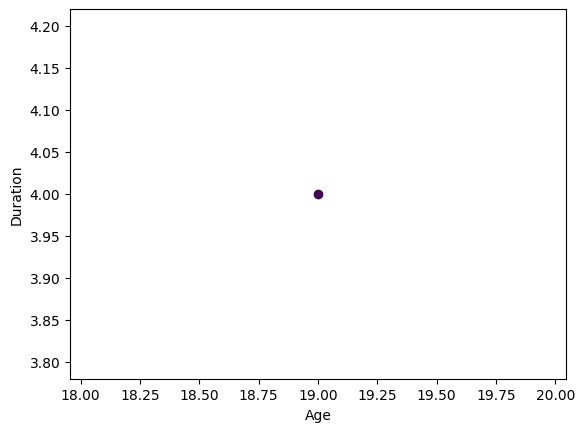

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np 

X = df[['age','duration']]
y = df['y']

model = LogisticRegression()
model.fit(X, y)

age_range = np.arange(19, 39, 87)
duration_range = np.arange(4, 185, 3025)

X_pred = np.array([(age, duration)for age in age_range for duration in duration_range])
y_pred = model.predict(X_pred)

plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred)
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()


<ipython-input-16-dd11aae80c73>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['no', 'yes'])


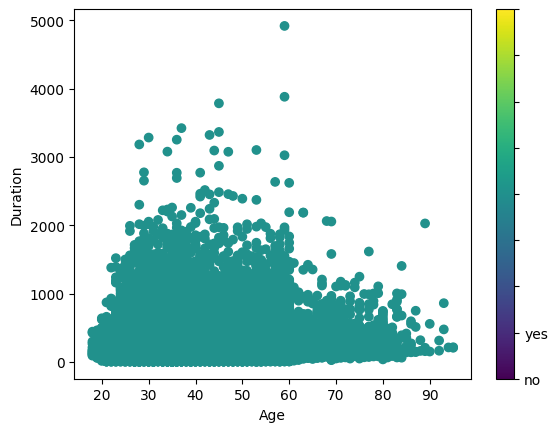

In [16]:
# create a scatter plot of age vs duration, color-coded by 'y'
plt.scatter(df['age'], df['duration'], c=df['y'].apply(lambda x: 1 if x=='yes' else 0))

# add axis labels
plt.xlabel('Age')
plt.ylabel('Duration')

# add a colorbar legend to show which color represents 'yes' and 'no'
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['no', 'yes'])

# display the plot
plt.show()

In [17]:
df = pd.read_csv('/content/DSSFINALPROJECT.csv',sep=',')

print(df['age'])

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64


In [18]:
import pandas as pd

# load the CSV file into a DataFrame
df = pd.read_csv('/content/DSSFINALPROJECT.csv', sep=',')

# define the age ranges
age_ranges = [18, 26, 51, 88]

# use pd.cut() to split the age data into the desired ranges
df['age_range'] = pd.cut(df['age'], bins=age_ranges, labels=['18 to 25', '26 to 50', '51 to 87'], right=False)

# create three separate columns for each age range using pd.get_dummies()
age_dummies = pd.get_dummies(df['age_range'])
df = pd.concat([df, age_dummies], axis=1)

# map the age ranges to the desired values (optional)
age_map = {'18 to 25': 'Young', '26 to 50': 'Middle-aged', '51 to 87': 'Senior'}
df['age_range'] = df['age_range'].map(age_map)

# print the resulting age range column
print(df['age_range'])


0             Senior
1        Middle-aged
2        Middle-aged
3        Middle-aged
4        Middle-aged
            ...     
45206         Senior
45207         Senior
45208         Senior
45209         Senior
45210    Middle-aged
Name: age_range, Length: 45211, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Senior']


In [19]:
df = df.drop(columns=['18 to 25', '26 to 50', '51 to 87'])

In [20]:
print(df['age_range'])

0             Senior
1        Middle-aged
2        Middle-aged
3        Middle-aged
4        Middle-aged
            ...     
45206         Senior
45207         Senior
45208         Senior
45209         Senior
45210    Middle-aged
Name: age_range, Length: 45211, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Senior']


In [21]:
df['age_status'] = df['age_range'].map({
    'Young': 1,
    'Middle-aged' : 2,
    'Senior' : 3
})

# map the "age_status" values to new columns
df['Young'] = df['age_status'].map({1: 1, 2: 0, 3: 0})
df['Middle-aged'] = df['age_status'].map({1: 0, 2: 1, 3: 0})
df['Senior'] = df['age_status'].map({1: 0, 2: 0, 3: 1})

# drop the original "age_status" columns
df.drop(columns=['age_status'], inplace=True)

age_range  Young  Middle-aged  Senior
y                                    
0           1016        30964    7935
1            320         3656    1306


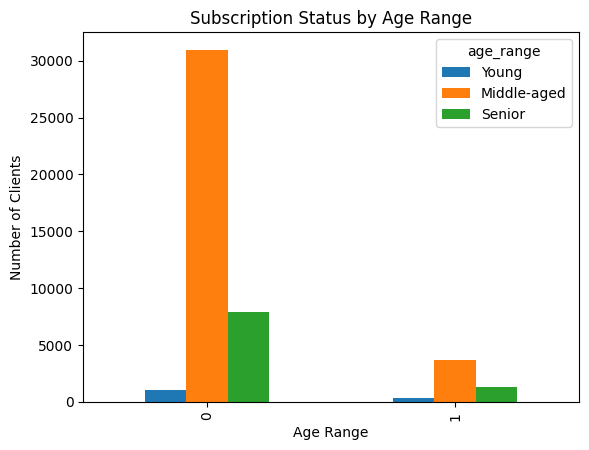

In [22]:
age_xtab = pd.crosstab(df['y'], df['age_range'])
print(age_xtab)

age_xtab.plot(kind='bar', stacked=False)

plt.title('Subscription Status by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Clients')

plt.show()

In [23]:
print(df['duration'].min())
print(df['duration'].median())
print(df['duration'].max())

0
180.0
4918


In [24]:
print(df['month'].unique())
print(df['day'].unique())


df_sorted = df.sort_values(['day','month'], ascending=True)
print(df_sorted['month'])

[ 5  6  7  8 10 11 12  1  2  3  4  9]
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
42818     2
42819     2
42820     2
42821     2
42822     2
         ..
24114    10
24115    10
24116    10
24117    10
42590    12
Name: month, Length: 45211, dtype: int64


In [25]:
duration_stats = df['duration'].describe()
print(duration_stats)

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [26]:
print(df['contact'])
print(df['contact'].unique())

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length: 45211, dtype: object
['unknown' 'cellular' 'telephone']


In [27]:
df['contact_status'] = df['contact'].map({
    'cellular': 1,
    'telephone' : 2,
    'unknown' : 3
})

# map the "education_status" values to new columns
df['cellular'] = df['contact_status'].map({1: 1, 2: 0, 3: 0})
df['telephone'] = df['contact_status'].map({1: 0, 2: 1, 3: 0})
df['unknown'] = df['contact_status'].map({1: 0, 2: 0, 3: 1})

# drop the original "education_status" columns
df.drop(columns=['contact_status'], inplace=True)

In [28]:
df.to_csv('/content/DSSFINALPROJECT.csv', index=True)

In [29]:
print(df['job'])

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object
